# 多项式回归PolynomailFeatures

In [53]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [54]:
# 生成一个一维的原始数据
x = np.arange(1,4).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [55]:
# 二次多项式，参数degree控制多项式的次方
poly = PolynomialFeatures(degree=2)
# 接口transform直接调用
x_ = poly.fit_transform(x)

In [56]:
x_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [57]:
x_.shape

(3, 3)

In [58]:
# 三次多项式
PolynomialFeatures(degree=3).fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [59]:
# 三次多项式，不带与截距相乘的x0
PolynomialFeatures(degree=3,include_bias=False).fit_transform(x)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [60]:
# 为什么不希望生成与截距x0相乘的部分呢？因为我们的线性回归并不知道我们已经准备了x0
xxx = PolynomialFeatures(degree=3).fit_transform(x)
xxx.shape

(3, 4)

In [61]:
xxx

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [62]:
rnd = np.random.RandomState(12)
y = rnd.randn(3)

In [63]:
y

array([ 0.47298583, -0.68142588,  0.2424395 ])

In [64]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(xxx,y).coef_

array([ 4.94743135e-15, -5.66294100e-01, -9.82061407e-01,  3.36866658e-01])

In [65]:
# 查看截距
LinearRegression().fit(xxx,y).intercept_

1.6844746794326337

In [66]:
# 可以看出截距不在系数中，也就是单独生成的
# 因此我们可以选择：关闭多项式回归中的include_bias
# 也可以选择在线性回归中关闭fit_intercept
LinearRegression(fit_intercept=False).fit(xxx,y).coef_

array([ 1.37189175,  0.00677461, -1.29464434,  0.38896381])

In [67]:
LinearRegression(fit_intercept=False).fit(xxx,y).intercept_

0.0

In [68]:
# 大多数的数据不会像上面这样是一维的，下面使用高维数据进行
x = np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [69]:
PolynomialFeatures(degree=2).fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [70]:
PolynomialFeatures(degree=3).fit_transform(x)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [71]:
# 只生成交互项
PolynomialFeatures(degree=3,interaction_only=True).fit_transform(x)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [72]:
# 更高维度的原始特征矩阵
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [73]:
PolynomialFeatures(degree=2).fit_transform(x)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  5.,  9., 12., 15., 16., 20., 25.],
       [ 1.,  6.,  7.,  8., 36., 42., 48., 49., 56., 64.]])

In [74]:
PolynomialFeatures(degree=3).fit_transform(x)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   5.,   9.,  12.,  15.,  16.,  20.,  25.,  27.,
         36.,  45.,  48.,  60.,  75.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,   8.,  36.,  42.,  48.,  49.,  56.,  64., 216.,
        252., 288., 294., 336., 384., 343., 392., 448., 512.]])

In [75]:
# 使用多项式回归处理非线性问题
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as PF
import numpy as np


In [76]:
# 设置随机种子
rnd = np.random.RandomState(12)
# 生成x
x = rnd.uniform(-3,3,size=100)
y = np.sin(x) + rnd.normal(size=len(x))


In [77]:
x

array([-2.07502295,  1.44029818, -1.42010991,  0.20243636, -2.91255023,
        2.51248205,  2.40428912, -2.79947143,  2.74169602, -2.17674407,
       -1.29702988,  0.63649911,  2.66535082,  2.11641325, -2.9864446 ,
        0.12735616,  0.3122258 , -0.08773552,  1.60880492, -2.03569948,
        1.5873627 , -2.87514121, -2.18873893, -2.3023619 , -1.14061449,
        1.02871587, -0.17262133,  1.89700979, -1.2624793 ,  1.39875587,
        1.21573413, -1.03458314, -0.99211483,  2.86834847,  0.74749267,
        2.70188115,  1.6048539 ,  1.95005552, -0.56015819, -0.29214953,
       -0.59621024,  2.97082896, -1.93461494,  2.77558142, -0.48449838,
       -0.45568532, -0.22110678, -0.75766111, -0.2069514 , -2.78899043,
       -2.49436398,  1.39512419,  0.81719996, -2.83255327, -1.19897964,
       -1.67488488, -2.66988004,  0.13947642, -0.50178206, -2.7106875 ,
        0.43442709,  1.8210999 , -2.31838968, -1.33729671,  0.85006855,
       -0.04357617,  0.03933645, -0.23135844,  2.36845844,  0.63

In [78]:
# 将x升维度
x = x.reshape(-1,1)

In [79]:
# 创建测试数据
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

In [80]:
line.shape

(1000, 1)

In [81]:
# 原始特征矩阵的拟合效果
lr = LinearRegression().fit(x,y)
# 对训练集的拟合
lr.score(x,y)


0.25231731062760665

In [82]:
import matplotlib.pyplot as plt
# 对测试集的拟合
lr.score(line,np.sin(line))

0.6473674404712557

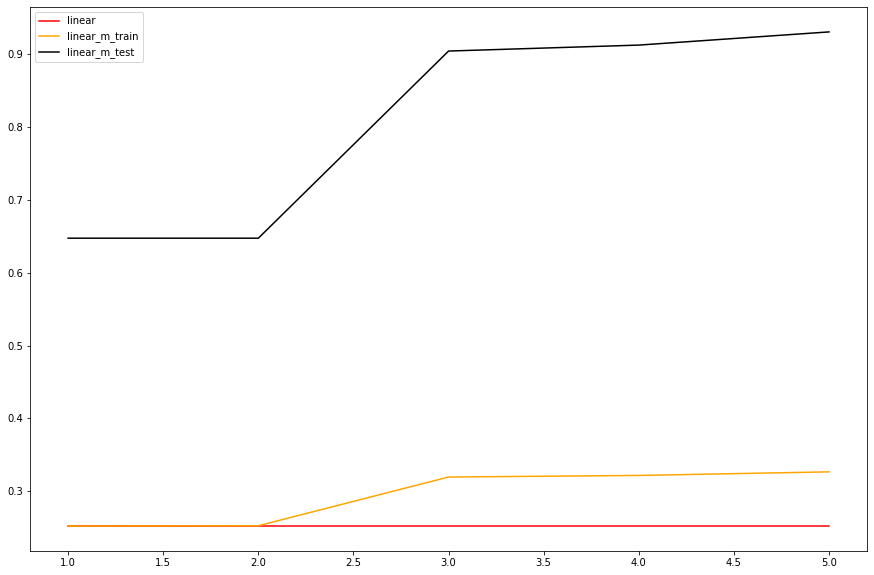

In [98]:
d = [1,2,3,4,5]
score_m = []
score_mp = []
score_mp_test = []
for i in d:
    lr_m = LinearRegression().fit(x,y)
    x_ = PF(degree=i).fit_transform(x,y)
    lr_mp = LinearRegression().fit(x_,y)
    line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
    line_ = PF(degree=i).fit_transform(line)
    score_m.append(lr_m.score(x,y))
    score_mp.append(lr_mp.score(x_,y))
    score_mp_test.append(lr_mp.score(line_,np.sin(line)))
plt.figure(figsize=(15,10))
plt.plot(d,score_m,c='red',label='linear')
plt.plot(d,score_mp,c='orange',label='linear_m_train')
plt.plot(d,score_mp_test,c='k',label='linear_m_test')
plt.legend()
plt.show()

In [84]:
lr_m = LinearRegression().fit(x,y)
x_ = PF(degree=4).fit_transform(x)
lr_mp = LinearRegression().fit(x_,y)
lr_m.score(x,y)

0.25231731062760665

In [101]:
score_mp_test.index(max(score_mp_test))

4

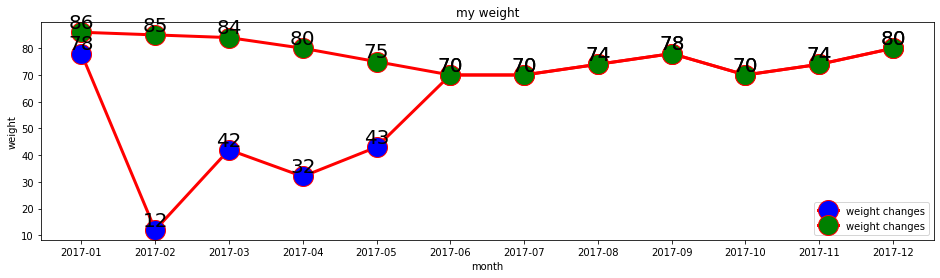

In [102]:
# encoding=utf-8
import matplotlib.pyplot as plt

# 月份
x1 = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
      '2017-09', '2017-10', '2017-11', '2017-12']

# 体重
y1 = [78, 12, 42, 32, 43, 70, 70, 74, 78, 70, 74, 80]


x2 = ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
      '2017-09', '2017-10', '2017-11', '2017-12']

# 体重
y2 = [86, 85, 84, 80, 75, 70, 70, 74, 78, 70, 74, 80]
# 设置画布大小
plt.figure(figsize=(16, 4))

# 标题
plt.title("my weight")

# 数据
plt.plot(x1, y1, label='weight changes', linewidth=3, color='r', marker='o',
         markerfacecolor='blue', markersize=20)
plt.plot(x2, y2, label='weight changes', linewidth=3, color='r', marker='o',
         markerfacecolor='green', markersize=20)
# 横坐标描述
plt.xlabel('month')

# 纵坐标描述
plt.ylabel('weight')

# 设置数字标签
for a, b in zip(x1, y1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=20)

for a, b in zip(x2, y2):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=20)

plt.legend()



In [109]:
[*zip(np.around(score_mp_test,decimals=2),d)]

[(0.65, 1), (0.65, 2), (0.9, 3), (0.91, 4), (0.93, 5)]